In [2]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad
from tqdm import tqdm
import pandas as pd

$$
\newcommand{\GP}{\mathcal{GP}}
$$

# Problem: Toy non-linear regression

We are going to use the toy dataset from 
$$
\GP
$$

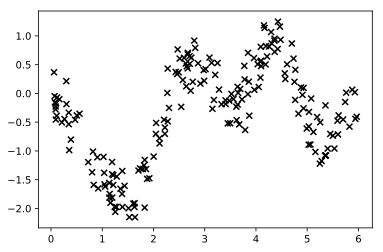

In [7]:
x_train = pd.read_csv('./data/train_inputs', header=None, sep='\s+').values
y_train = pd.read_csv('./data/train_outputs', header=None, sep='\s+').values

plt.scatter(x_train, y_train, marker='x', color='k')

In [31]:
def rbf(X, sigma_f, length_scale):
    
    num_points = X.shape[0]
    
    cov = np.dot(X, X.T)
    diag = np.diag(cov)
    
    # (x_n - x_m)' (x_n - x_m) = x_n'x_n + x_m'x_m - 2x_n'x_m
    cov_ = diag.reshape((num_points, 1)) + diag.reshape((1, num_points)) - 2 * cov
    
    return (sigma_f ** 2.) * np.exp(1. / (2 * length_scale ** 2.) * cov_)


def woodbury(A_diag, B, C, D):
    """
    A_diag - Vector representation of a diagonal matrix
    
    (A + B(D_inv)C)_inv = A_inv - A_inv B(D + CA_inv B)_inv CA_inv
    
    E = (D + CA_inv B)_inv
    """
    
    A_diag_inv = 1. / A_diag
    
    E = np.linalg.inv(D + np.dot(C * A_diag_inv.reshape((1, -1)), B))
    
    inv = -np.dot(np.dot(A_diag_inv.reshape((-1, 1)) * B, E), C * A_diag_inv.reshape((1, -1)))
    
    inv[np.diag_indices_from(inv)] += A_diag_inv.squeeze()
    
    return inv

def fast_matrix_det():
    pass

def free_energy(X_m, X_n, sigma_noise, sigma_f, length_scale):
    n = len(X_n)
    
    K = rbf(np.concatenate((X_n, X_m), axis=0), sigma_f, length_scale)
    
    K_mm = K[n:, n:]
    K_nm = K[:n, n:]

In [36]:
a = np.eye(10)
b = np.random.random((10, 4))
d = np.random.random((4, 4))
c = np.random.random((4, 10))
d_inv = np.linalg.inv(d)

m = a + np.dot(np.dot(b, d_inv), c)

m_inv = np.linalg.inv(m)
#print(woodbury(np.ones(10), b, c, d))
#print(m_inv)